In [1]:
# Dependencies and Setup
# %matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
drug_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combine_data = pd.merge(drug_data, mouse_data)

# Display the data table for preview

combine_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_vol = combine_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vol_df = pd.DataFrame(tumor_vol)
# Preview DataFrame
tumor_vol_df=tumor_vol_df.reset_index()

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_se = combine_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]

print(type(tumor_vol_se))

# Convert to DataFrame
tumor_vol_se_df = pd.DataFrame(tumor_vol_se)
# Preview DataFrame

tumor_vol_se_df=tumor_vol_se_df.reset_index()

<class 'pandas.core.series.Series'>


In [4]:
tumor_vol_se_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [5]:
# Minor Data Munging to Re-Format the Data Frames (using pandas)
tumor_vol_df
tumor_vol_df_piv = tumor_vol_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]
tumor_vol_se_df_piv = tumor_vol_se_df.pivot(index = "Timepoint", columns = "Drug")["Tumor Volume (mm3)"]

In [6]:
tumor_vol_df_piv


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [7]:

# Preview that Reformatting worked


In [8]:
tumor_vol_se_df_piv

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


No handles with labels found to put in legend.


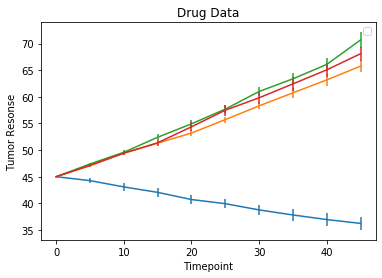

In [9]:


plt.errorbar(tumor_vol_se_df_piv.index, tumor_vol_df_piv["Capomulin"],yerr=tumor_vol_se_df_piv["Capomulin"])
plt.errorbar(tumor_vol_se_df_piv.index, tumor_vol_df_piv["Infubinol"],yerr=tumor_vol_se_df_piv["Infubinol"])
plt.errorbar(tumor_vol_se_df_piv.index, tumor_vol_df_piv["Ketapril"],yerr=tumor_vol_se_df_piv["Ketapril"])
plt.errorbar(tumor_vol_se_df_piv.index, tumor_vol_df_piv["Placebo"],yerr=tumor_vol_se_df_piv["Placebo"])


# Save the Figure
plt.title("Drug Data")
plt.ylabel("Tumor Resonse")
plt.xlabel("Timepoint")
plt.legend()
plt.savefig("Drug Data.png")
plt.show()


In [10]:
# Show the Figure ^ (done above)


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_data_mean = combine_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_data_mean_df = pd.DataFrame(metastatic_data_mean)
# Preview DataFrame
metastatic_data_mean_df=metastatic_data_mean_df.reset_index()

In [12]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
metastatic_data_sen= combine_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]

# Convert to DataFrame
metastatic_data_sen_df = pd.DataFrame(metastatic_data_sen)
# Preview DataFrame

metastatic_data_sen_df = metastatic_data_sen_df.reset_index()

print(metastatic_data_sen_df.head())


        Drug  Timepoint  Metastatic Sites
0  Capomulin          0          0.000000
1  Capomulin          5          0.074833
2  Capomulin         10          0.125433
3  Capomulin         15          0.132048
4  Capomulin         20          0.161621


In [13]:

metastatic_df_piv = metastatic_data_mean_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
metastatic_se_df_piv = metastatic_data_sen_df.pivot(index = "Timepoint", columns = "Drug")["Metastatic Sites"]

In [14]:
metastatic_df_piv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


No handles with labels found to put in legend.


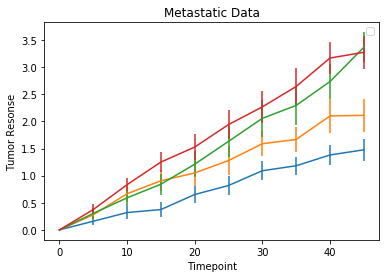

In [15]:
# (Capomulin, Infubinol, Ketapril, and Placebo)


plt.errorbar(tumor_vol_se_df_piv.index, metastatic_df_piv["Capomulin"],yerr=metastatic_se_df_piv["Capomulin"])
plt.errorbar(tumor_vol_se_df_piv.index, metastatic_df_piv["Infubinol"],yerr=metastatic_se_df_piv["Infubinol"])
plt.errorbar(tumor_vol_se_df_piv.index, metastatic_df_piv["Ketapril"],yerr=metastatic_se_df_piv["Ketapril"])
plt.errorbar(tumor_vol_se_df_piv.index, metastatic_df_piv["Placebo"],yerr=metastatic_se_df_piv["Placebo"])


# Save the Figure
plt.title("Metastatic Data")
plt.ylabel("Tumor Resonse")
plt.xlabel("Timepoint")
plt.legend()
plt.savefig("Drug Data.png")
plt.show()


In [16]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

No handles with labels found to put in legend.


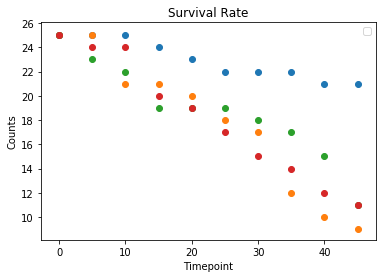

In [17]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame
mouse_counts = combine_data.groupby(['Drug','Timepoint'])['Mouse ID'].count()

mouse_df = pd.DataFrame(mouse_counts).reset_index()
mouse_df.columns = ['Drug', 'Timepoint', 'Mouse Count']

metastatic_df_piv = mouse_df.pivot(index = "Timepoint", columns = "Drug")["Mouse Count"]

mouse_df.head()

plt.scatter(metastatic_df_piv.index, metastatic_df_piv["Capomulin"])
plt.scatter(metastatic_df_piv.index, metastatic_df_piv["Infubinol"])
plt.scatter(metastatic_df_piv.index, metastatic_df_piv["Ketapril"])
plt.scatter(metastatic_df_piv.index, metastatic_df_piv["Placebo"])


# Save the Figure
plt.title("Survival Rate")
plt.ylabel("Counts")
plt.xlabel("Timepoint")
plt.legend()
plt.savefig("Drug Data.png")
plt.show()

In [18]:
(45 - 38) / 45

0.15555555555555556

In [19]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [20]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug

combine_data = combine_data.sort_values(['Drug','Mouse ID','Timepoint'], ascending=[True, True, True])


combine_data['pct_change'] = combine_data.groupby(['Drug','Mouse ID'])['Tumor Volume (mm3)'].pct_change() + 1

combine_data.head()


total_pct_chg = combine_data.groupby(['Drug','Mouse ID'])['pct_change'].sum()
total_ct_df = pd.DataFrame(total_pct_chg).reset_index()

print(total_ct_df.head())

mean_pct_chg = total_ct_df.groupby(['Drug'])['pct_change'].mean()
mean_pct_chg_df = pd.DataFrame(mean_pct_chg).reset_index()

print(mean_pct_chg_df.head(10))

        Drug Mouse ID  pct_change
0  Capomulin     b128    8.862766
1  Capomulin     b742    8.862542
2  Capomulin     f966    3.630624
3  Capomulin     g288    8.818021
4  Capomulin     g316    8.896400
        Drug  pct_change
0  Capomulin    7.997795
1   Ceftamin    6.364936
2  Infubinol    6.384506
3   Ketapril    6.850630
4   Naftisol    6.741944
5    Placebo    6.534082
6   Propriva    5.668019
7   Ramicane    7.904087
8   Stelasyn    7.062440
9  Zoniferol    6.550351


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Survival Bar Chart')

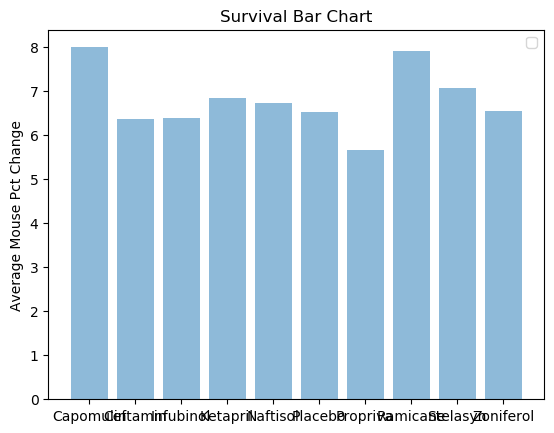

In [22]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = mean_pct_chg_df['Drug'].tolist()
y_pos = np.arange(len(objects))
performance = mean_pct_chg_df['pct_change'].tolist()

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Average Mouse Pct Change')
plt.legend()
plt.title('Survival Bar Chart')

In [23]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

NameError: name 'fig' is not defined

![Metastatic Spread During Treatment](../Images/change.png)